# Diamond Price Prediction

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Load and Preview data

In [55]:
df = pd.read_csv("./diamonds.csv", index_col=0)

print("dataset size:", len(df))
print(df.head(10))
print(df.shape)

dataset size: 53940
    carat        cut color clarity  depth  table  price     x     y     z
1    0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2    0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3    0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4    0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5    0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
6    0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
7    0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
8    0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
9    0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
10   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39
(53940, 10)


### Preparing Data

In [56]:
# We can turn the quality labels (e.g. "Fair", "Good") into numbers based on what they represent

cut_enc = {
    "Fair": 0,
    "Good": 1,
    "Very Good": 2,
    "Premium": 3,
    "Ideal": 4
}

clarity_enc = {
    "I1": 0,
    "SI2": 1,
    "SI1": 2,
    "VS2": 3,
    "VS1": 4,
    "VVS2": 5,
    "VVS1": 6,
    "IF": 7,
}

color_enc = {
    "J": 0,
    "I": 1,
    "H": 2,
    "G": 3,
    "F": 4,
    "E": 5,
    "D": 6,
}

df["cut"] = df["cut"].map(cut_enc)
df["clarity"] = df["clarity"].map(clarity_enc)
df["color"] = df["color"].map(color_enc)

print(df.head())


   carat  cut  color  clarity  depth  table  price     x     y     z
1   0.23    4      5        1   61.5   55.0    326  3.95  3.98  2.43
2   0.21    3      5        2   59.8   61.0    326  3.89  3.84  2.31
3   0.23    1      5        4   56.9   65.0    327  4.05  4.07  2.31
4   0.29    3      1        3   62.4   58.0    334  4.20  4.23  2.63
5   0.31    1      0        1   63.3   58.0    335  4.34  4.35  2.75


### Visualizing Data

<AxesSubplot:>

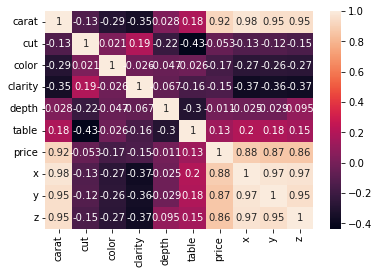

In [74]:
sns.heatmap(df.corr(), annot=True)

# note that X, Y, and Z have a high correlation with Carats (makes sense, weight is calculated from dimensions)
# as a result, we are able to remove them without losing much information.

### Data preparation (Cont)

In [75]:
# Shuffling the dataset
df = df.sample(frac=1)

# Split into input and output data
X = df.drop(["price", "x", "y", "z"], axis=1)
y = df["price"].values
y = np.reshape(y, (-1, 1)) # This reshapes y from an array (wrong) to an array of rows with size 1 (right)

print(X.head())
print(X.shape)
print("---")
print(y)
print(y.shape)

       carat  cut  color  clarity  depth  table
24166   2.04    3      2        2   62.2   60.0
40387   0.42    4      6        5   61.7   57.0
51815   0.76    2      2        1   59.8   58.0
14738   1.09    4      5        2   61.1   55.0
24878   1.59    4      6        2   61.3   56.0
(53940, 6)
---
[[12341]
 [ 1132]
 [ 2418]
 ...
 [  810]
 [ 1876]
 [17515]]
(53940, 1)


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split into training and evaluation data (this way we can see if our model is overfitting)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Scaling the data into the range 0...1 for better performance in neural networks
X_scaler = MinMaxScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)

print(X_train)
print("---")
print(y_train)

[[0.01455301 1.         1.         0.85714286 0.525      0.38888889]
 [0.37629938 1.         0.16666667 0.42857143 0.49166667 0.38888889]
 [0.02702703 1.         0.66666667 0.85714286 0.52222222 0.27777778]
 ...
 [0.04781705 1.         0.66666667 0.28571429 0.51111111 0.33333333]
 [0.02910603 1.         0.83333333 1.         0.52777778 0.36111111]
 [0.27234927 0.25       0.5        0.28571429 0.55833333 0.36111111]]
---
[[0.01600692]
 [0.91234047]
 [0.0299589 ]
 ...
 [0.02265845]
 [0.04526282]
 [0.48301968]]


### Building the model

In [77]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation="relu", input_dim=6))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="relu"))

model.summary()

from tensorflow.keras.losses import mae
model.compile(loss=mae, optimizer="Adam", metrics=["mse"])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 64)                448       
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


### Training!!!

In [78]:
model_stats = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_test, y_test)
)

Epoch 1/30
   1/1349 [..............................] - ETA: 5:52 - loss: 0.2666 - mse: 0.1397

2022-06-17 11:49:16.587275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1349/1349 [==============================] - ETA: 0s - loss: 0.0351 - mse: 0.0045

2022-06-17 11:49:22.762720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1349/1349 [==============================] - 7s 5ms/step - loss: 0.0351 - mse: 0.0045 - val_loss: 0.0221 - val_mse: 0.0015
Epoch 2/30
1349/1349 [==============================] - 7s 5ms/step - loss: 0.0222 - mse: 0.0014 - val_loss: 0.0214 - val_mse: 0.0014
Epoch 3/30
1349/1349 [==============================] - 7s 5ms/step - loss: 0.0206 - mse: 0.0013 - val_loss: 0.0196 - val_mse: 0.0013
Epoch 4/30
1349/1349 [==============================] - 7s 5ms/step - loss: 0.0196 - mse: 0.0012 - val_loss: 0.0200 - val_mse: 0.0013
Epoch 5/30
1349/1349 [==============================] - 7s 5ms/step - loss: 0.0190 - mse: 0.0011 - val_loss: 0.0185 - val_mse: 0.0011
Epoch 6/30
1349/1349 [==============================] - 7s 5ms/step - loss: 0.0190 - mse: 0.0011 - val_loss: 0.0178 - val_mse: 0.0011
Epoch 7/30
1349/1349 [==============================] - 7s 5ms/step - loss: 0.0187 - mse: 0.0011 - val_loss: 0.0202 - val_mse: 0.0012
Epoch 8/30
1349/1349 [==============================] - 7s 5ms/step - los

### Visualizing results

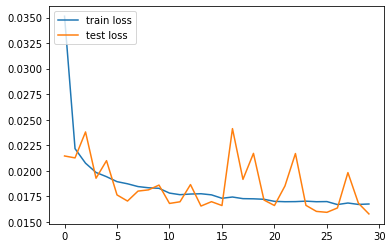

In [61]:
plt.plot(model_stats.history["loss"])
plt.plot(model_stats.history["val_loss"])
plt.legend(["train loss", "test loss"], loc="upper left")

### Testing our own data

In [85]:
X_pred = [1, "Ideal", "I", "VS1", 63.6, 57.0]

X_pred[1] = cut_enc[X_pred[1]]
X_pred[2] = color_enc[X_pred[2]]
X_pred[3] = clarity_enc[X_pred[3]]

X_pred = np.reshape(X_pred, (1, -1))
X_pred = X_scaler.transform(X_pred)

print(X_pred)

y_pred = model.predict(X_pred)
y_pred = y_scaler.inverse_transform(y_pred)

print("Predicted price:", y_pred)

[[0.16632017 1.         0.16666667 0.57142857 0.57222222 0.38888889]]
Predicted price: [[4826.674]]


/Users/eric/miniforge3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
